In [1]:
import os
import numpy as np
import pandas as pd
from random import randrange 
from PIL import Image
import matplotlib.pyplot as plt
import random
import cv2

In [2]:
height = 224 # 224
width = 224 # 224

## Guage image

In [3]:
gauge_1 = "./gauge_img/gauge.png"

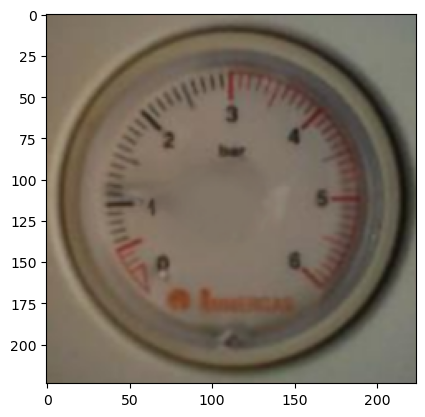

In [4]:
gauge_1_img = Image.open(gauge_1).convert('RGBA')
gauge_1_img = gauge_1_img.resize((height, width), Image.BILINEAR)
plt.imshow(gauge_1_img)

## Needle image

In [5]:
needle = "./gauge_img/needle.png"

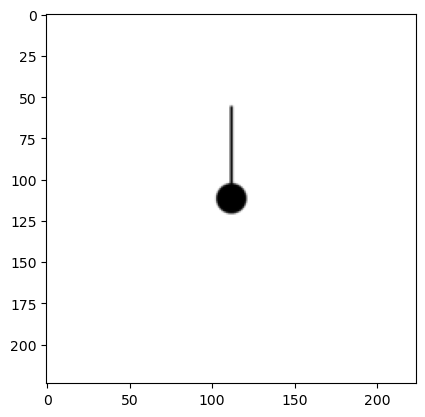

In [6]:
needle_img = Image.open(needle).convert('RGBA')
needle_img = needle_img.resize((height, width), Image.BILINEAR)
plt.imshow(needle_img)

## Generate Random Image

In [7]:
rotate_degree = randrange(0, 360) #-180,180

In [8]:
print("rotate degree: ", rotate_degree)

rotate degree:  70


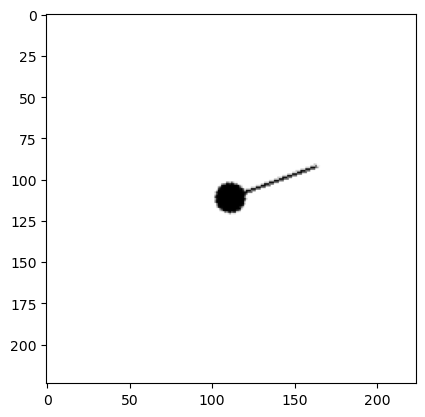

In [9]:
rotate_needle = needle_img.rotate(rotate_degree, expand=False)
rotate_needle = rotate_needle.transpose(Image.FLIP_LEFT_RIGHT)
plt.imshow(rotate_needle)

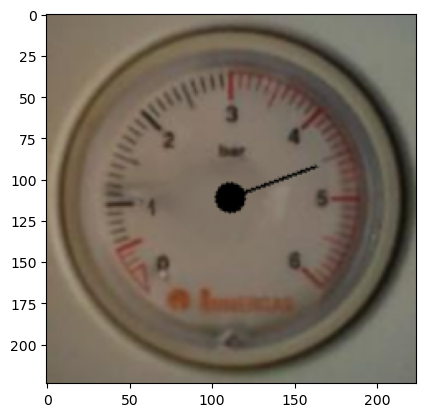

In [10]:
random_gauge = gauge_1_img.copy()
random_gauge.paste(rotate_needle.convert('L'), (0, 0), rotate_needle.convert('RGBA'))
plt.imshow(random_gauge)

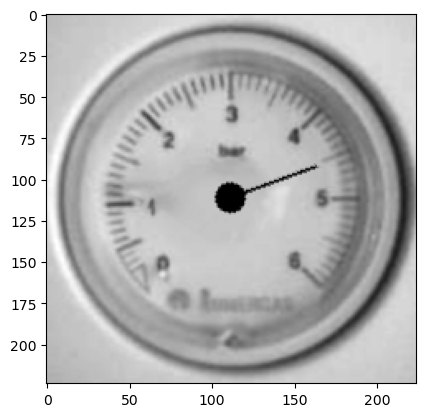

In [11]:
gray_random_gauge = random_gauge.convert('L')
plt.imshow(gray_random_gauge, cmap='gray')

## Data Augmentation

In [12]:
def random_bright(img, p=0.5, lower=0.02, upper=1.02):
    img = np.array(img, dtype='uint8')
    
    if random.random() < p:
        img = img * random.uniform(lower, upper)
    
    img = Image.fromarray(np.uint8(img))
    
    return img

In [13]:
def random_swap(img, p=0.5):
    img = np.array(img, dtype='uint8')
    
    perms = [(0,1,2), (0,2,1), (1,0,2), (1,2,0), (2,0,1), (2,1,0)]
    if random.random() < p:
        swap = perms[random.randrange(0, len(perms))]
        img[:, :, (0,1,2)] = img[:, :, swap]
    
    img = Image.fromarray(np.uint8(img))
    
    return img

In [14]:
def random_saturation(img, p=0.5, lower=0.02, upper=1.02):
    img = np.array(img, dtype='uint8')
    
    if random.random() < p:
        img[:, :, 1] = img[:, :, 1] * random.uniform(lower, upper)
    
    img = Image.fromarray(np.uint8(img))
    
    return img

In [15]:
def random_hue(img, p=0.5, delta=18.0):
    img = np.array(img, dtype='uint8')
    
    if random.random() < p:
        img[:, :, 0] = img[:, :, 0] + random.uniform(-delta, delta)
        img[:, :, 0][img[:, :, 0] > 360.0] = img[:, :, 0][img[:, :, 0] > 360.0] - 360.0
        img[:, :, 0][img[:, :, 0] < 0.0] = img[:, :, 0][img[:, :, 0] < 0.0] + 360.0
    
    img = Image.fromarray(np.uint8(img))
    
    return img

In [16]:
def data_augmentation(src):
    dst = src.copy()
    dst = random_bright(dst, p=0.5)
#     dst = random_swap(dst, p=0.5)
    dst = random_saturation(dst, p=0.5)
    dst = random_hue(dst, p=0.5)
    
    return dst

In [17]:
# conda install openpyxl
def data_generator(num, imgDir_path, labDir_path):
    degree_list = []
    for i in range(num):
        rotate_degree = randrange(0, 360) #-180,180 
        degree_list.append(int(rotate_degree / 2)) # label scaling /2
        print("{}, rotate degree: {}".format(i, rotate_degree))
        
        rotate_needle = needle_img.rotate(rotate_degree, expand=False)
        rotate_needle = rotate_needle.transpose(Image.FLIP_LEFT_RIGHT)
        
        random_gauge = gauge_1_img.copy()
        
        # data augmentation
#         random_gauge = data_augmentation(random_gauge)
        
        random_gauge.paste(rotate_needle.convert('L'), (0, 0), rotate_needle.convert('RGBA'))
        
        
        gray_random_gauge = random_gauge.convert('L') # to gray
        
        img_path = imgDir_path + '/' + str(i) + '.png'
        gray_random_gauge.save(img_path, "png")
    
    df = pd.DataFrame(degree_list, columns=['degree'])
    df.index.name = None
    return df

In [18]:
imgDir_path = './train_img'
labDir_path = './train_label'

In [19]:
num = 5000

In [20]:
df = data_generator(num, imgDir_path, labDir_path)

0, rotate degree: 308
1, rotate degree: 214
2, rotate degree: 119
3, rotate degree: 184
4, rotate degree: 197
5, rotate degree: 92
6, rotate degree: 307
7, rotate degree: 329
8, rotate degree: 260
9, rotate degree: 19
10, rotate degree: 222
11, rotate degree: 104
12, rotate degree: 151
13, rotate degree: 99
14, rotate degree: 114
15, rotate degree: 223
16, rotate degree: 301
17, rotate degree: 295
18, rotate degree: 303
19, rotate degree: 296
20, rotate degree: 76
21, rotate degree: 99
22, rotate degree: 177
23, rotate degree: 320
24, rotate degree: 14
25, rotate degree: 300
26, rotate degree: 105
27, rotate degree: 305
28, rotate degree: 280
29, rotate degree: 162
30, rotate degree: 262
31, rotate degree: 127
32, rotate degree: 135
33, rotate degree: 106
34, rotate degree: 189
35, rotate degree: 44
36, rotate degree: 106
37, rotate degree: 56
38, rotate degree: 99
39, rotate degree: 319
40, rotate degree: 85
41, rotate degree: 33
42, rotate degree: 252
43, rotate degree: 80
44, rotate

353, rotate degree: 181
354, rotate degree: 161
355, rotate degree: 290
356, rotate degree: 179
357, rotate degree: 202
358, rotate degree: 103
359, rotate degree: 150
360, rotate degree: 92
361, rotate degree: 307
362, rotate degree: 286
363, rotate degree: 326
364, rotate degree: 186
365, rotate degree: 84
366, rotate degree: 238
367, rotate degree: 95
368, rotate degree: 20
369, rotate degree: 288
370, rotate degree: 209
371, rotate degree: 250
372, rotate degree: 124
373, rotate degree: 238
374, rotate degree: 33
375, rotate degree: 135
376, rotate degree: 235
377, rotate degree: 351
378, rotate degree: 66
379, rotate degree: 238
380, rotate degree: 155
381, rotate degree: 203
382, rotate degree: 145
383, rotate degree: 334
384, rotate degree: 91
385, rotate degree: 350
386, rotate degree: 285
387, rotate degree: 153
388, rotate degree: 303
389, rotate degree: 118
390, rotate degree: 37
391, rotate degree: 341
392, rotate degree: 191
393, rotate degree: 257
394, rotate degree: 115


719, rotate degree: 65
720, rotate degree: 359
721, rotate degree: 239
722, rotate degree: 339
723, rotate degree: 104
724, rotate degree: 174
725, rotate degree: 175
726, rotate degree: 334
727, rotate degree: 186
728, rotate degree: 119
729, rotate degree: 232
730, rotate degree: 33
731, rotate degree: 153
732, rotate degree: 147
733, rotate degree: 121
734, rotate degree: 58
735, rotate degree: 245
736, rotate degree: 79
737, rotate degree: 294
738, rotate degree: 143
739, rotate degree: 230
740, rotate degree: 97
741, rotate degree: 353
742, rotate degree: 258
743, rotate degree: 75
744, rotate degree: 37
745, rotate degree: 124
746, rotate degree: 284
747, rotate degree: 61
748, rotate degree: 316
749, rotate degree: 295
750, rotate degree: 243
751, rotate degree: 83
752, rotate degree: 234
753, rotate degree: 166
754, rotate degree: 98
755, rotate degree: 226
756, rotate degree: 137
757, rotate degree: 58
758, rotate degree: 144
759, rotate degree: 174
760, rotate degree: 279
761

1087, rotate degree: 336
1088, rotate degree: 259
1089, rotate degree: 328
1090, rotate degree: 219
1091, rotate degree: 60
1092, rotate degree: 71
1093, rotate degree: 303
1094, rotate degree: 58
1095, rotate degree: 133
1096, rotate degree: 354
1097, rotate degree: 330
1098, rotate degree: 173
1099, rotate degree: 171
1100, rotate degree: 194
1101, rotate degree: 274
1102, rotate degree: 14
1103, rotate degree: 128
1104, rotate degree: 132
1105, rotate degree: 147
1106, rotate degree: 237
1107, rotate degree: 263
1108, rotate degree: 184
1109, rotate degree: 112
1110, rotate degree: 70
1111, rotate degree: 343
1112, rotate degree: 181
1113, rotate degree: 279
1114, rotate degree: 47
1115, rotate degree: 181
1116, rotate degree: 168
1117, rotate degree: 205
1118, rotate degree: 322
1119, rotate degree: 117
1120, rotate degree: 357
1121, rotate degree: 35
1122, rotate degree: 224
1123, rotate degree: 282
1124, rotate degree: 14
1125, rotate degree: 253
1126, rotate degree: 242
1127, ro

1427, rotate degree: 35
1428, rotate degree: 331
1429, rotate degree: 154
1430, rotate degree: 98
1431, rotate degree: 323
1432, rotate degree: 273
1433, rotate degree: 51
1434, rotate degree: 236
1435, rotate degree: 144
1436, rotate degree: 349
1437, rotate degree: 208
1438, rotate degree: 26
1439, rotate degree: 289
1440, rotate degree: 238
1441, rotate degree: 165
1442, rotate degree: 147
1443, rotate degree: 256
1444, rotate degree: 9
1445, rotate degree: 78
1446, rotate degree: 91
1447, rotate degree: 296
1448, rotate degree: 277
1449, rotate degree: 146
1450, rotate degree: 0
1451, rotate degree: 188
1452, rotate degree: 115
1453, rotate degree: 78
1454, rotate degree: 236
1455, rotate degree: 168
1456, rotate degree: 254
1457, rotate degree: 207
1458, rotate degree: 60
1459, rotate degree: 296
1460, rotate degree: 126
1461, rotate degree: 167
1462, rotate degree: 236
1463, rotate degree: 237
1464, rotate degree: 148
1465, rotate degree: 120
1466, rotate degree: 339
1467, rotate

1767, rotate degree: 91
1768, rotate degree: 208
1769, rotate degree: 188
1770, rotate degree: 270
1771, rotate degree: 112
1772, rotate degree: 191
1773, rotate degree: 102
1774, rotate degree: 358
1775, rotate degree: 323
1776, rotate degree: 281
1777, rotate degree: 93
1778, rotate degree: 295
1779, rotate degree: 76
1780, rotate degree: 16
1781, rotate degree: 190
1782, rotate degree: 150
1783, rotate degree: 162
1784, rotate degree: 150
1785, rotate degree: 153
1786, rotate degree: 166
1787, rotate degree: 329
1788, rotate degree: 150
1789, rotate degree: 263
1790, rotate degree: 220
1791, rotate degree: 247
1792, rotate degree: 28
1793, rotate degree: 354
1794, rotate degree: 115
1795, rotate degree: 261
1796, rotate degree: 73
1797, rotate degree: 152
1798, rotate degree: 60
1799, rotate degree: 220
1800, rotate degree: 303
1801, rotate degree: 211
1802, rotate degree: 330
1803, rotate degree: 4
1804, rotate degree: 59
1805, rotate degree: 180
1806, rotate degree: 66
1807, rotat

2107, rotate degree: 175
2108, rotate degree: 76
2109, rotate degree: 341
2110, rotate degree: 272
2111, rotate degree: 42
2112, rotate degree: 351
2113, rotate degree: 202
2114, rotate degree: 102
2115, rotate degree: 242
2116, rotate degree: 43
2117, rotate degree: 9
2118, rotate degree: 281
2119, rotate degree: 299
2120, rotate degree: 70
2121, rotate degree: 262
2122, rotate degree: 254
2123, rotate degree: 356
2124, rotate degree: 132
2125, rotate degree: 139
2126, rotate degree: 21
2127, rotate degree: 223
2128, rotate degree: 59
2129, rotate degree: 200
2130, rotate degree: 253
2131, rotate degree: 238
2132, rotate degree: 119
2133, rotate degree: 292
2134, rotate degree: 136
2135, rotate degree: 273
2136, rotate degree: 356
2137, rotate degree: 218
2138, rotate degree: 110
2139, rotate degree: 302
2140, rotate degree: 107
2141, rotate degree: 86
2142, rotate degree: 69
2143, rotate degree: 82
2144, rotate degree: 157
2145, rotate degree: 140
2146, rotate degree: 47
2147, rotate

2448, rotate degree: 22
2449, rotate degree: 207
2450, rotate degree: 152
2451, rotate degree: 174
2452, rotate degree: 208
2453, rotate degree: 292
2454, rotate degree: 115
2455, rotate degree: 304
2456, rotate degree: 11
2457, rotate degree: 226
2458, rotate degree: 5
2459, rotate degree: 136
2460, rotate degree: 298
2461, rotate degree: 21
2462, rotate degree: 199
2463, rotate degree: 43
2464, rotate degree: 194
2465, rotate degree: 358
2466, rotate degree: 290
2467, rotate degree: 132
2468, rotate degree: 293
2469, rotate degree: 272
2470, rotate degree: 93
2471, rotate degree: 339
2472, rotate degree: 16
2473, rotate degree: 252
2474, rotate degree: 317
2475, rotate degree: 155
2476, rotate degree: 277
2477, rotate degree: 5
2478, rotate degree: 345
2479, rotate degree: 356
2480, rotate degree: 174
2481, rotate degree: 152
2482, rotate degree: 245
2483, rotate degree: 190
2484, rotate degree: 255
2485, rotate degree: 280
2486, rotate degree: 322
2487, rotate degree: 321
2488, rota

2789, rotate degree: 316
2790, rotate degree: 273
2791, rotate degree: 29
2792, rotate degree: 277
2793, rotate degree: 260
2794, rotate degree: 175
2795, rotate degree: 173
2796, rotate degree: 106
2797, rotate degree: 114
2798, rotate degree: 324
2799, rotate degree: 150
2800, rotate degree: 289
2801, rotate degree: 317
2802, rotate degree: 89
2803, rotate degree: 142
2804, rotate degree: 140
2805, rotate degree: 48
2806, rotate degree: 286
2807, rotate degree: 310
2808, rotate degree: 91
2809, rotate degree: 96
2810, rotate degree: 178
2811, rotate degree: 142
2812, rotate degree: 77
2813, rotate degree: 11
2814, rotate degree: 44
2815, rotate degree: 349
2816, rotate degree: 246
2817, rotate degree: 166
2818, rotate degree: 131
2819, rotate degree: 129
2820, rotate degree: 185
2821, rotate degree: 336
2822, rotate degree: 71
2823, rotate degree: 326
2824, rotate degree: 163
2825, rotate degree: 223
2826, rotate degree: 67
2827, rotate degree: 303
2828, rotate degree: 256
2829, rota

3128, rotate degree: 144
3129, rotate degree: 146
3130, rotate degree: 18
3131, rotate degree: 147
3132, rotate degree: 44
3133, rotate degree: 180
3134, rotate degree: 142
3135, rotate degree: 224
3136, rotate degree: 0
3137, rotate degree: 329
3138, rotate degree: 101
3139, rotate degree: 207
3140, rotate degree: 233
3141, rotate degree: 221
3142, rotate degree: 222
3143, rotate degree: 280
3144, rotate degree: 122
3145, rotate degree: 9
3146, rotate degree: 34
3147, rotate degree: 290
3148, rotate degree: 65
3149, rotate degree: 171
3150, rotate degree: 316
3151, rotate degree: 93
3152, rotate degree: 54
3153, rotate degree: 111
3154, rotate degree: 272
3155, rotate degree: 196
3156, rotate degree: 290
3157, rotate degree: 290
3158, rotate degree: 87
3159, rotate degree: 277
3160, rotate degree: 211
3161, rotate degree: 228
3162, rotate degree: 25
3163, rotate degree: 202
3164, rotate degree: 327
3165, rotate degree: 307
3166, rotate degree: 241
3167, rotate degree: 64
3168, rotate 

3470, rotate degree: 341
3471, rotate degree: 328
3472, rotate degree: 329
3473, rotate degree: 304
3474, rotate degree: 8
3475, rotate degree: 50
3476, rotate degree: 291
3477, rotate degree: 200
3478, rotate degree: 251
3479, rotate degree: 114
3480, rotate degree: 36
3481, rotate degree: 165
3482, rotate degree: 152
3483, rotate degree: 268
3484, rotate degree: 211
3485, rotate degree: 163
3486, rotate degree: 94
3487, rotate degree: 282
3488, rotate degree: 330
3489, rotate degree: 47
3490, rotate degree: 75
3491, rotate degree: 177
3492, rotate degree: 332
3493, rotate degree: 276
3494, rotate degree: 308
3495, rotate degree: 179
3496, rotate degree: 19
3497, rotate degree: 350
3498, rotate degree: 9
3499, rotate degree: 155
3500, rotate degree: 12
3501, rotate degree: 298
3502, rotate degree: 326
3503, rotate degree: 27
3504, rotate degree: 248
3505, rotate degree: 58
3506, rotate degree: 99
3507, rotate degree: 55
3508, rotate degree: 42
3509, rotate degree: 282
3510, rotate deg

3809, rotate degree: 171
3810, rotate degree: 54
3811, rotate degree: 48
3812, rotate degree: 335
3813, rotate degree: 190
3814, rotate degree: 210
3815, rotate degree: 277
3816, rotate degree: 172
3817, rotate degree: 330
3818, rotate degree: 170
3819, rotate degree: 46
3820, rotate degree: 126
3821, rotate degree: 51
3822, rotate degree: 152
3823, rotate degree: 351
3824, rotate degree: 161
3825, rotate degree: 4
3826, rotate degree: 38
3827, rotate degree: 57
3828, rotate degree: 74
3829, rotate degree: 155
3830, rotate degree: 238
3831, rotate degree: 332
3832, rotate degree: 294
3833, rotate degree: 81
3834, rotate degree: 253
3835, rotate degree: 4
3836, rotate degree: 32
3837, rotate degree: 289
3838, rotate degree: 169
3839, rotate degree: 22
3840, rotate degree: 354
3841, rotate degree: 166
3842, rotate degree: 212
3843, rotate degree: 173
3844, rotate degree: 18
3845, rotate degree: 213
3846, rotate degree: 182
3847, rotate degree: 187
3848, rotate degree: 99
3849, rotate deg

4151, rotate degree: 198
4152, rotate degree: 51
4153, rotate degree: 180
4154, rotate degree: 88
4155, rotate degree: 26
4156, rotate degree: 247
4157, rotate degree: 291
4158, rotate degree: 229
4159, rotate degree: 294
4160, rotate degree: 339
4161, rotate degree: 72
4162, rotate degree: 222
4163, rotate degree: 88
4164, rotate degree: 267
4165, rotate degree: 280
4166, rotate degree: 204
4167, rotate degree: 219
4168, rotate degree: 28
4169, rotate degree: 228
4170, rotate degree: 316
4171, rotate degree: 166
4172, rotate degree: 37
4173, rotate degree: 86
4174, rotate degree: 243
4175, rotate degree: 309
4176, rotate degree: 248
4177, rotate degree: 190
4178, rotate degree: 175
4179, rotate degree: 207
4180, rotate degree: 216
4181, rotate degree: 226
4182, rotate degree: 337
4183, rotate degree: 290
4184, rotate degree: 252
4185, rotate degree: 332
4186, rotate degree: 324
4187, rotate degree: 153
4188, rotate degree: 342
4189, rotate degree: 90
4190, rotate degree: 261
4191, rot

4491, rotate degree: 298
4492, rotate degree: 337
4493, rotate degree: 181
4494, rotate degree: 326
4495, rotate degree: 54
4496, rotate degree: 76
4497, rotate degree: 48
4498, rotate degree: 305
4499, rotate degree: 94
4500, rotate degree: 338
4501, rotate degree: 185
4502, rotate degree: 227
4503, rotate degree: 347
4504, rotate degree: 137
4505, rotate degree: 196
4506, rotate degree: 203
4507, rotate degree: 13
4508, rotate degree: 57
4509, rotate degree: 229
4510, rotate degree: 243
4511, rotate degree: 217
4512, rotate degree: 22
4513, rotate degree: 145
4514, rotate degree: 70
4515, rotate degree: 321
4516, rotate degree: 342
4517, rotate degree: 222
4518, rotate degree: 115
4519, rotate degree: 34
4520, rotate degree: 123
4521, rotate degree: 313
4522, rotate degree: 252
4523, rotate degree: 103
4524, rotate degree: 98
4525, rotate degree: 176
4526, rotate degree: 209
4527, rotate degree: 283
4528, rotate degree: 24
4529, rotate degree: 260
4530, rotate degree: 5
4531, rotate 

4834, rotate degree: 344
4835, rotate degree: 330
4836, rotate degree: 300
4837, rotate degree: 156
4838, rotate degree: 83
4839, rotate degree: 73
4840, rotate degree: 27
4841, rotate degree: 157
4842, rotate degree: 191
4843, rotate degree: 248
4844, rotate degree: 317
4845, rotate degree: 70
4846, rotate degree: 74
4847, rotate degree: 100
4848, rotate degree: 123
4849, rotate degree: 10
4850, rotate degree: 227
4851, rotate degree: 233
4852, rotate degree: 295
4853, rotate degree: 304
4854, rotate degree: 92
4855, rotate degree: 187
4856, rotate degree: 76
4857, rotate degree: 173
4858, rotate degree: 199
4859, rotate degree: 277
4860, rotate degree: 214
4861, rotate degree: 183
4862, rotate degree: 114
4863, rotate degree: 48
4864, rotate degree: 137
4865, rotate degree: 249
4866, rotate degree: 305
4867, rotate degree: 66
4868, rotate degree: 316
4869, rotate degree: 318
4870, rotate degree: 265
4871, rotate degree: 334
4872, rotate degree: 194
4873, rotate degree: 138
4874, rota

5174, rotate degree: 245
5175, rotate degree: 130
5176, rotate degree: 288
5177, rotate degree: 84
5178, rotate degree: 130
5179, rotate degree: 92
5180, rotate degree: 48
5181, rotate degree: 184
5182, rotate degree: 251
5183, rotate degree: 308
5184, rotate degree: 261
5185, rotate degree: 71
5186, rotate degree: 324
5187, rotate degree: 286
5188, rotate degree: 182
5189, rotate degree: 45
5190, rotate degree: 351
5191, rotate degree: 349
5192, rotate degree: 315
5193, rotate degree: 137
5194, rotate degree: 62
5195, rotate degree: 189
5196, rotate degree: 177
5197, rotate degree: 111
5198, rotate degree: 78
5199, rotate degree: 188
5200, rotate degree: 163
5201, rotate degree: 249
5202, rotate degree: 301
5203, rotate degree: 192
5204, rotate degree: 36
5205, rotate degree: 173
5206, rotate degree: 215
5207, rotate degree: 335
5208, rotate degree: 280
5209, rotate degree: 346
5210, rotate degree: 262
5211, rotate degree: 71
5212, rotate degree: 42
5213, rotate degree: 58
5214, rotat

5513, rotate degree: 134
5514, rotate degree: 267
5515, rotate degree: 180
5516, rotate degree: 124
5517, rotate degree: 3
5518, rotate degree: 37
5519, rotate degree: 308
5520, rotate degree: 10
5521, rotate degree: 275
5522, rotate degree: 262
5523, rotate degree: 266
5524, rotate degree: 124
5525, rotate degree: 286
5526, rotate degree: 342
5527, rotate degree: 77
5528, rotate degree: 27
5529, rotate degree: 207
5530, rotate degree: 331
5531, rotate degree: 38
5532, rotate degree: 343
5533, rotate degree: 324
5534, rotate degree: 31
5535, rotate degree: 226
5536, rotate degree: 182
5537, rotate degree: 204
5538, rotate degree: 72
5539, rotate degree: 204
5540, rotate degree: 236
5541, rotate degree: 154
5542, rotate degree: 169
5543, rotate degree: 275
5544, rotate degree: 144
5545, rotate degree: 263
5546, rotate degree: 337
5547, rotate degree: 158
5548, rotate degree: 337
5549, rotate degree: 118
5550, rotate degree: 94
5551, rotate degree: 290
5552, rotate degree: 217
5553, rota

5851, rotate degree: 327
5852, rotate degree: 212
5853, rotate degree: 66
5854, rotate degree: 273
5855, rotate degree: 164
5856, rotate degree: 331
5857, rotate degree: 118
5858, rotate degree: 259
5859, rotate degree: 191
5860, rotate degree: 52
5861, rotate degree: 226
5862, rotate degree: 5
5863, rotate degree: 296
5864, rotate degree: 64
5865, rotate degree: 79
5866, rotate degree: 224
5867, rotate degree: 189
5868, rotate degree: 28
5869, rotate degree: 271
5870, rotate degree: 335
5871, rotate degree: 266
5872, rotate degree: 294
5873, rotate degree: 136
5874, rotate degree: 95
5875, rotate degree: 283
5876, rotate degree: 263
5877, rotate degree: 13
5878, rotate degree: 286
5879, rotate degree: 249
5880, rotate degree: 207
5881, rotate degree: 218
5882, rotate degree: 36
5883, rotate degree: 64
5884, rotate degree: 319
5885, rotate degree: 267
5886, rotate degree: 187
5887, rotate degree: 256
5888, rotate degree: 53
5889, rotate degree: 289
5890, rotate degree: 257
5891, rotate

6189, rotate degree: 283
6190, rotate degree: 174
6191, rotate degree: 104
6192, rotate degree: 318
6193, rotate degree: 205
6194, rotate degree: 12
6195, rotate degree: 204
6196, rotate degree: 346
6197, rotate degree: 308
6198, rotate degree: 351
6199, rotate degree: 105
6200, rotate degree: 106
6201, rotate degree: 52
6202, rotate degree: 116
6203, rotate degree: 43
6204, rotate degree: 328
6205, rotate degree: 0
6206, rotate degree: 293
6207, rotate degree: 35
6208, rotate degree: 241
6209, rotate degree: 173
6210, rotate degree: 85
6211, rotate degree: 59
6212, rotate degree: 11
6213, rotate degree: 287
6214, rotate degree: 341
6215, rotate degree: 158
6216, rotate degree: 61
6217, rotate degree: 65
6218, rotate degree: 285
6219, rotate degree: 52
6220, rotate degree: 179
6221, rotate degree: 42
6222, rotate degree: 269
6223, rotate degree: 79
6224, rotate degree: 148
6225, rotate degree: 44
6226, rotate degree: 330
6227, rotate degree: 21
6228, rotate degree: 230
6229, rotate deg

6527, rotate degree: 318
6528, rotate degree: 2
6529, rotate degree: 144
6530, rotate degree: 228
6531, rotate degree: 35
6532, rotate degree: 178
6533, rotate degree: 50
6534, rotate degree: 27
6535, rotate degree: 82
6536, rotate degree: 163
6537, rotate degree: 320
6538, rotate degree: 70
6539, rotate degree: 159
6540, rotate degree: 243
6541, rotate degree: 31
6542, rotate degree: 195
6543, rotate degree: 283
6544, rotate degree: 7
6545, rotate degree: 144
6546, rotate degree: 356
6547, rotate degree: 262
6548, rotate degree: 19
6549, rotate degree: 231
6550, rotate degree: 4
6551, rotate degree: 230
6552, rotate degree: 252
6553, rotate degree: 140
6554, rotate degree: 182
6555, rotate degree: 344
6556, rotate degree: 92
6557, rotate degree: 143
6558, rotate degree: 50
6559, rotate degree: 150
6560, rotate degree: 93
6561, rotate degree: 314
6562, rotate degree: 14
6563, rotate degree: 88
6564, rotate degree: 235
6565, rotate degree: 296
6566, rotate degree: 346
6567, rotate degre

6865, rotate degree: 343
6866, rotate degree: 206
6867, rotate degree: 122
6868, rotate degree: 335
6869, rotate degree: 206
6870, rotate degree: 127
6871, rotate degree: 101
6872, rotate degree: 103
6873, rotate degree: 211
6874, rotate degree: 114
6875, rotate degree: 163
6876, rotate degree: 248
6877, rotate degree: 117
6878, rotate degree: 77
6879, rotate degree: 340
6880, rotate degree: 200
6881, rotate degree: 58
6882, rotate degree: 316
6883, rotate degree: 167
6884, rotate degree: 232
6885, rotate degree: 358
6886, rotate degree: 155
6887, rotate degree: 294
6888, rotate degree: 42
6889, rotate degree: 184
6890, rotate degree: 181
6891, rotate degree: 20
6892, rotate degree: 222
6893, rotate degree: 115
6894, rotate degree: 224
6895, rotate degree: 261
6896, rotate degree: 332
6897, rotate degree: 292
6898, rotate degree: 50
6899, rotate degree: 279
6900, rotate degree: 149
6901, rotate degree: 347
6902, rotate degree: 203
6903, rotate degree: 357
6904, rotate degree: 227
6905,

7203, rotate degree: 28
7204, rotate degree: 212
7205, rotate degree: 282
7206, rotate degree: 329
7207, rotate degree: 329
7208, rotate degree: 4
7209, rotate degree: 245
7210, rotate degree: 39
7211, rotate degree: 14
7212, rotate degree: 36
7213, rotate degree: 130
7214, rotate degree: 223
7215, rotate degree: 290
7216, rotate degree: 217
7217, rotate degree: 93
7218, rotate degree: 336
7219, rotate degree: 97
7220, rotate degree: 190
7221, rotate degree: 61
7222, rotate degree: 338
7223, rotate degree: 33
7224, rotate degree: 93
7225, rotate degree: 5
7226, rotate degree: 276
7227, rotate degree: 32
7228, rotate degree: 351
7229, rotate degree: 74
7230, rotate degree: 195
7231, rotate degree: 100
7232, rotate degree: 313
7233, rotate degree: 12
7234, rotate degree: 210
7235, rotate degree: 293
7236, rotate degree: 324
7237, rotate degree: 184
7238, rotate degree: 174
7239, rotate degree: 264
7240, rotate degree: 208
7241, rotate degree: 208
7242, rotate degree: 338
7243, rotate deg

7542, rotate degree: 264
7543, rotate degree: 113
7544, rotate degree: 258
7545, rotate degree: 279
7546, rotate degree: 52
7547, rotate degree: 91
7548, rotate degree: 284
7549, rotate degree: 351
7550, rotate degree: 115
7551, rotate degree: 174
7552, rotate degree: 252
7553, rotate degree: 111
7554, rotate degree: 69
7555, rotate degree: 80
7556, rotate degree: 246
7557, rotate degree: 332
7558, rotate degree: 1
7559, rotate degree: 307
7560, rotate degree: 240
7561, rotate degree: 135
7562, rotate degree: 107
7563, rotate degree: 16
7564, rotate degree: 47
7565, rotate degree: 354
7566, rotate degree: 58
7567, rotate degree: 45
7568, rotate degree: 2
7569, rotate degree: 319
7570, rotate degree: 90
7571, rotate degree: 136
7572, rotate degree: 91
7573, rotate degree: 165
7574, rotate degree: 187
7575, rotate degree: 62
7576, rotate degree: 185
7577, rotate degree: 122
7578, rotate degree: 129
7579, rotate degree: 102
7580, rotate degree: 306
7581, rotate degree: 235
7582, rotate de

7883, rotate degree: 90
7884, rotate degree: 305
7885, rotate degree: 29
7886, rotate degree: 21
7887, rotate degree: 216
7888, rotate degree: 135
7889, rotate degree: 346
7890, rotate degree: 37
7891, rotate degree: 311
7892, rotate degree: 255
7893, rotate degree: 340
7894, rotate degree: 214
7895, rotate degree: 267
7896, rotate degree: 93
7897, rotate degree: 165
7898, rotate degree: 102
7899, rotate degree: 259
7900, rotate degree: 63
7901, rotate degree: 337
7902, rotate degree: 26
7903, rotate degree: 160
7904, rotate degree: 273
7905, rotate degree: 209
7906, rotate degree: 302
7907, rotate degree: 218
7908, rotate degree: 241
7909, rotate degree: 84
7910, rotate degree: 37
7911, rotate degree: 95
7912, rotate degree: 250
7913, rotate degree: 243
7914, rotate degree: 236
7915, rotate degree: 95
7916, rotate degree: 359
7917, rotate degree: 319
7918, rotate degree: 109
7919, rotate degree: 318
7920, rotate degree: 116
7921, rotate degree: 9
7922, rotate degree: 222
7923, rotate 

8223, rotate degree: 341
8224, rotate degree: 46
8225, rotate degree: 87
8226, rotate degree: 228
8227, rotate degree: 341
8228, rotate degree: 199
8229, rotate degree: 160
8230, rotate degree: 125
8231, rotate degree: 101
8232, rotate degree: 88
8233, rotate degree: 171
8234, rotate degree: 317
8235, rotate degree: 11
8236, rotate degree: 204
8237, rotate degree: 249
8238, rotate degree: 339
8239, rotate degree: 302
8240, rotate degree: 105
8241, rotate degree: 359
8242, rotate degree: 282
8243, rotate degree: 62
8244, rotate degree: 71
8245, rotate degree: 135
8246, rotate degree: 67
8247, rotate degree: 88
8248, rotate degree: 45
8249, rotate degree: 257
8250, rotate degree: 48
8251, rotate degree: 23
8252, rotate degree: 302
8253, rotate degree: 180
8254, rotate degree: 332
8255, rotate degree: 256
8256, rotate degree: 124
8257, rotate degree: 324
8258, rotate degree: 148
8259, rotate degree: 187
8260, rotate degree: 350
8261, rotate degree: 143
8262, rotate degree: 195
8263, rotat

8564, rotate degree: 64
8565, rotate degree: 336
8566, rotate degree: 100
8567, rotate degree: 90
8568, rotate degree: 75
8569, rotate degree: 224
8570, rotate degree: 223
8571, rotate degree: 96
8572, rotate degree: 107
8573, rotate degree: 262
8574, rotate degree: 324
8575, rotate degree: 64
8576, rotate degree: 334
8577, rotate degree: 314
8578, rotate degree: 149
8579, rotate degree: 114
8580, rotate degree: 332
8581, rotate degree: 89
8582, rotate degree: 132
8583, rotate degree: 12
8584, rotate degree: 100
8585, rotate degree: 347
8586, rotate degree: 156
8587, rotate degree: 211
8588, rotate degree: 117
8589, rotate degree: 20
8590, rotate degree: 119
8591, rotate degree: 331
8592, rotate degree: 311
8593, rotate degree: 29
8594, rotate degree: 2
8595, rotate degree: 328
8596, rotate degree: 241
8597, rotate degree: 282
8598, rotate degree: 204
8599, rotate degree: 318
8600, rotate degree: 284
8601, rotate degree: 149
8602, rotate degree: 311
8603, rotate degree: 244
8604, rotat

8908, rotate degree: 289
8909, rotate degree: 150
8910, rotate degree: 331
8911, rotate degree: 317
8912, rotate degree: 130
8913, rotate degree: 211
8914, rotate degree: 188
8915, rotate degree: 19
8916, rotate degree: 77
8917, rotate degree: 96
8918, rotate degree: 264
8919, rotate degree: 82
8920, rotate degree: 308
8921, rotate degree: 281
8922, rotate degree: 177
8923, rotate degree: 59
8924, rotate degree: 231
8925, rotate degree: 206
8926, rotate degree: 141
8927, rotate degree: 130
8928, rotate degree: 240
8929, rotate degree: 325
8930, rotate degree: 258
8931, rotate degree: 26
8932, rotate degree: 162
8933, rotate degree: 271
8934, rotate degree: 328
8935, rotate degree: 9
8936, rotate degree: 135
8937, rotate degree: 156
8938, rotate degree: 324
8939, rotate degree: 222
8940, rotate degree: 155
8941, rotate degree: 114
8942, rotate degree: 310
8943, rotate degree: 1
8944, rotate degree: 112
8945, rotate degree: 326
8946, rotate degree: 87
8947, rotate degree: 313
8948, rotat

9249, rotate degree: 348
9250, rotate degree: 8
9251, rotate degree: 168
9252, rotate degree: 36
9253, rotate degree: 121
9254, rotate degree: 225
9255, rotate degree: 239
9256, rotate degree: 207
9257, rotate degree: 183
9258, rotate degree: 227
9259, rotate degree: 118
9260, rotate degree: 353
9261, rotate degree: 343
9262, rotate degree: 206
9263, rotate degree: 98
9264, rotate degree: 225
9265, rotate degree: 0
9266, rotate degree: 185
9267, rotate degree: 314
9268, rotate degree: 119
9269, rotate degree: 357
9270, rotate degree: 129
9271, rotate degree: 265
9272, rotate degree: 23
9273, rotate degree: 257
9274, rotate degree: 88
9275, rotate degree: 59
9276, rotate degree: 57
9277, rotate degree: 62
9278, rotate degree: 263
9279, rotate degree: 301
9280, rotate degree: 132
9281, rotate degree: 358
9282, rotate degree: 6
9283, rotate degree: 166
9284, rotate degree: 169
9285, rotate degree: 136
9286, rotate degree: 46
9287, rotate degree: 346
9288, rotate degree: 282
9289, rotate d

9587, rotate degree: 358
9588, rotate degree: 298
9589, rotate degree: 125
9590, rotate degree: 98
9591, rotate degree: 319
9592, rotate degree: 49
9593, rotate degree: 119
9594, rotate degree: 338
9595, rotate degree: 235
9596, rotate degree: 242
9597, rotate degree: 301
9598, rotate degree: 250
9599, rotate degree: 276
9600, rotate degree: 224
9601, rotate degree: 117
9602, rotate degree: 77
9603, rotate degree: 198
9604, rotate degree: 59
9605, rotate degree: 358
9606, rotate degree: 176
9607, rotate degree: 153
9608, rotate degree: 219
9609, rotate degree: 134
9610, rotate degree: 248
9611, rotate degree: 255
9612, rotate degree: 297
9613, rotate degree: 301
9614, rotate degree: 254
9615, rotate degree: 294
9616, rotate degree: 271
9617, rotate degree: 34
9618, rotate degree: 98
9619, rotate degree: 71
9620, rotate degree: 69
9621, rotate degree: 122
9622, rotate degree: 163
9623, rotate degree: 76
9624, rotate degree: 114
9625, rotate degree: 282
9626, rotate degree: 157
9627, rot

9925, rotate degree: 164
9926, rotate degree: 151
9927, rotate degree: 139
9928, rotate degree: 233
9929, rotate degree: 226
9930, rotate degree: 203
9931, rotate degree: 224
9932, rotate degree: 180
9933, rotate degree: 56
9934, rotate degree: 61
9935, rotate degree: 74
9936, rotate degree: 292
9937, rotate degree: 340
9938, rotate degree: 286
9939, rotate degree: 306
9940, rotate degree: 300
9941, rotate degree: 83
9942, rotate degree: 197
9943, rotate degree: 159
9944, rotate degree: 136
9945, rotate degree: 201
9946, rotate degree: 43
9947, rotate degree: 148
9948, rotate degree: 89
9949, rotate degree: 312
9950, rotate degree: 214
9951, rotate degree: 182
9952, rotate degree: 103
9953, rotate degree: 242
9954, rotate degree: 285
9955, rotate degree: 318
9956, rotate degree: 354
9957, rotate degree: 183
9958, rotate degree: 88
9959, rotate degree: 131
9960, rotate degree: 248
9961, rotate degree: 182
9962, rotate degree: 37
9963, rotate degree: 210
9964, rotate degree: 229
9965, ro

In [21]:
df.head(5)

degree
0     154
1     107
2      59
3      92
4      98

In [22]:
df.to_csv(labDir_path + "/label.csv")

In [23]:
df

degree
0        154
1        107
2         59
3         92
4         98
...      ...
9995      45
9996      44
9997      76
9998     149
9999     158

[10000 rows x 1 columns]

In [24]:
train_img_path = "./train_img/" 

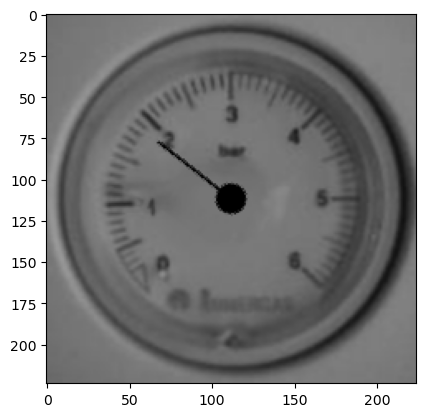

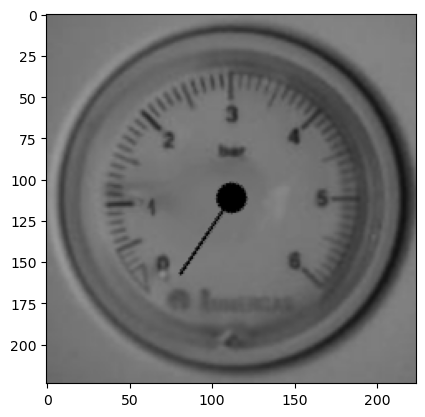

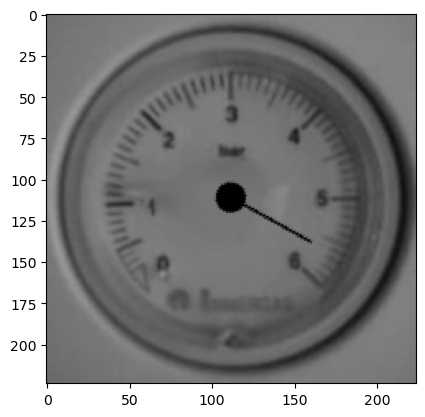

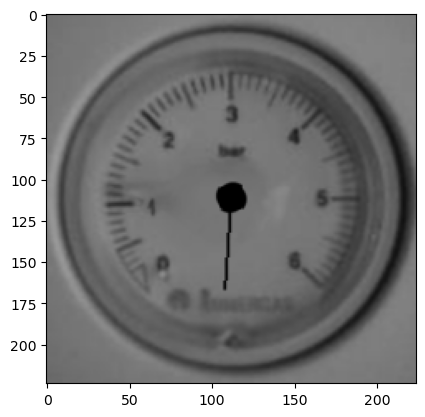

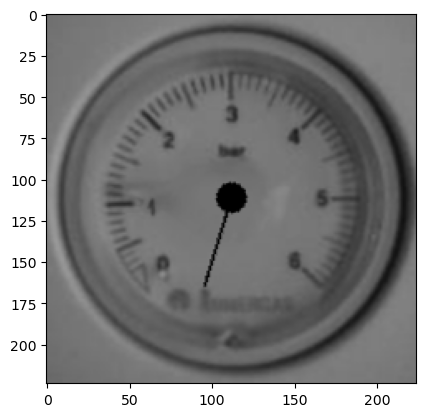

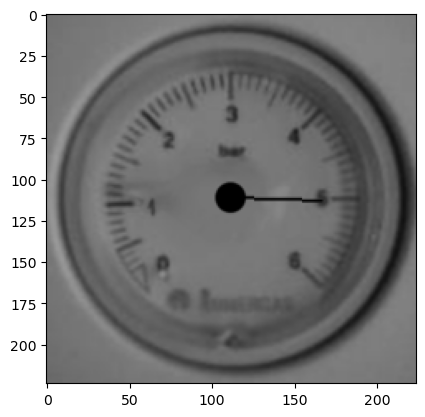

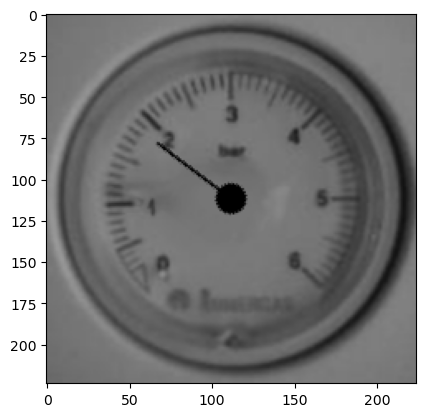

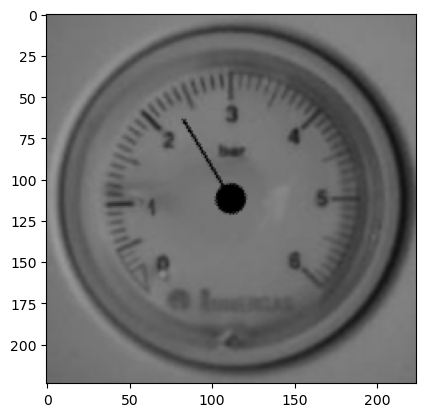

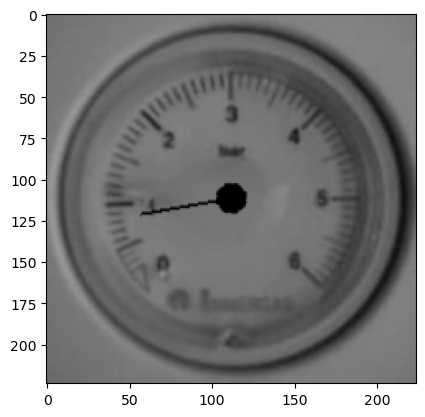

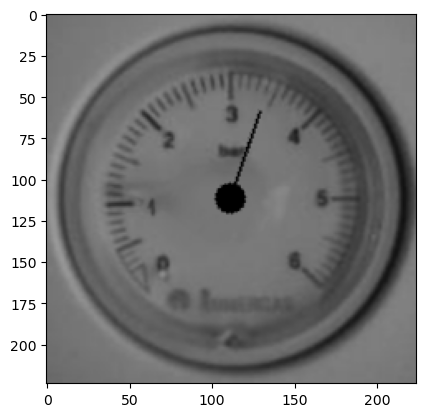

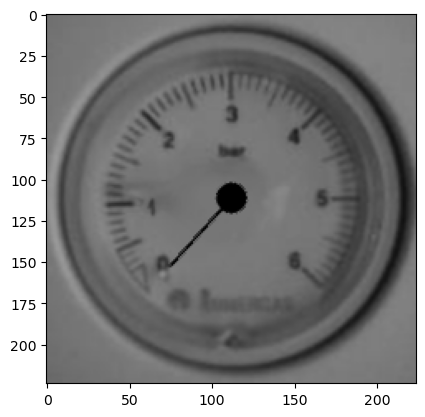

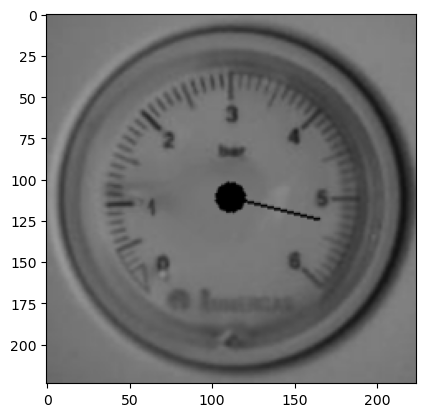

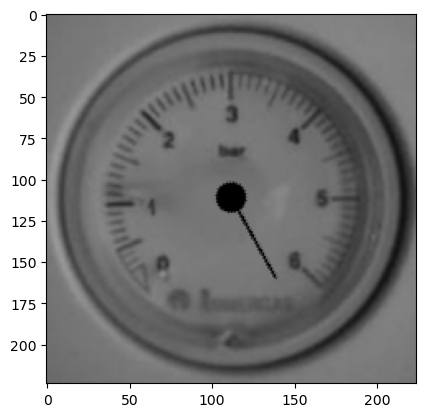

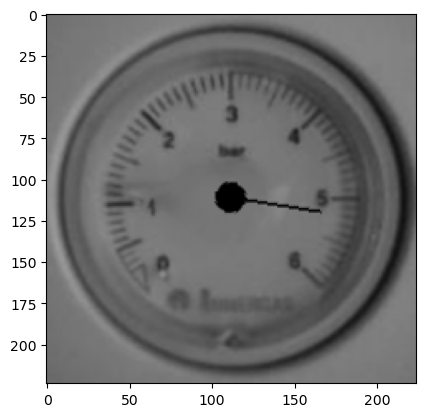

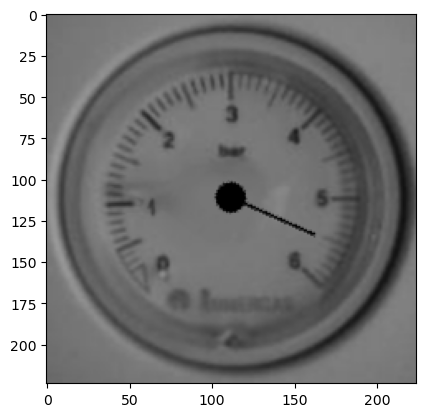

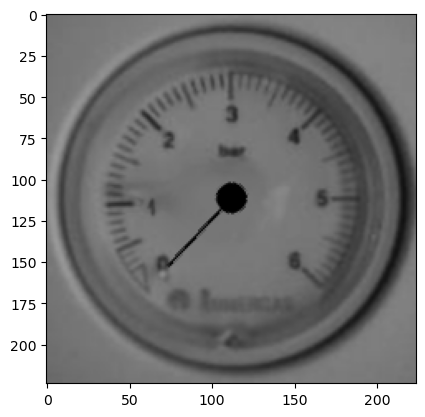

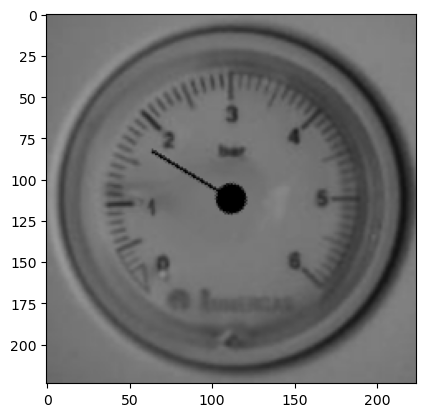

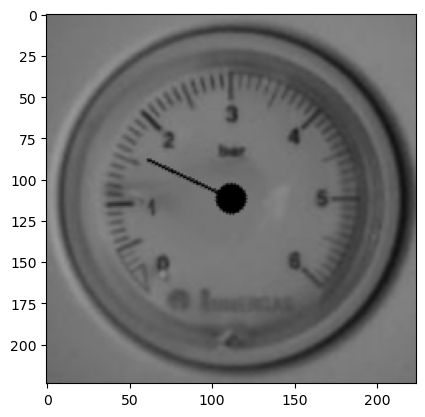

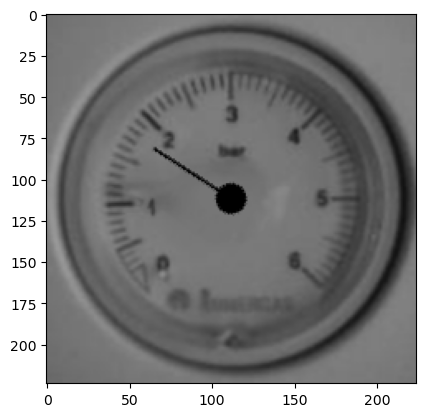

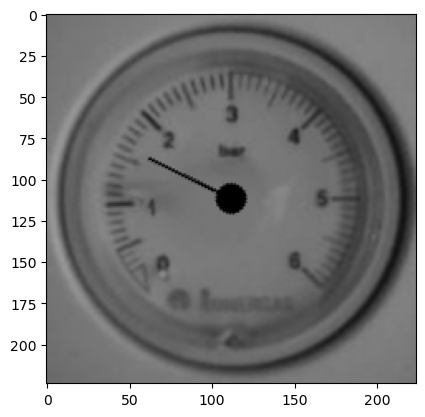

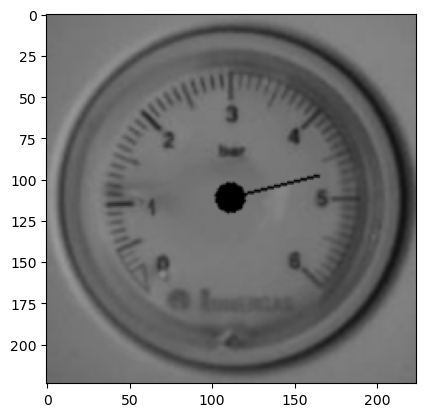

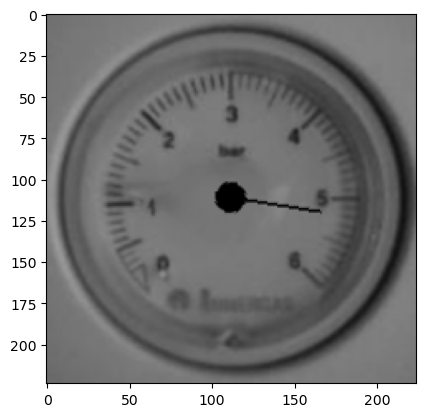

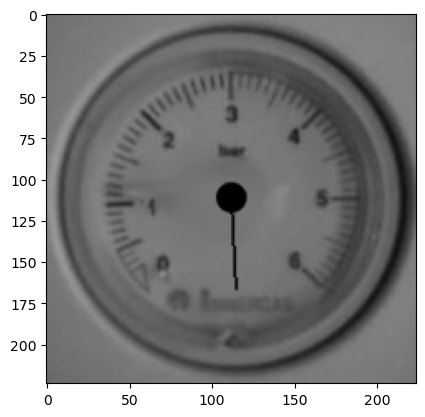

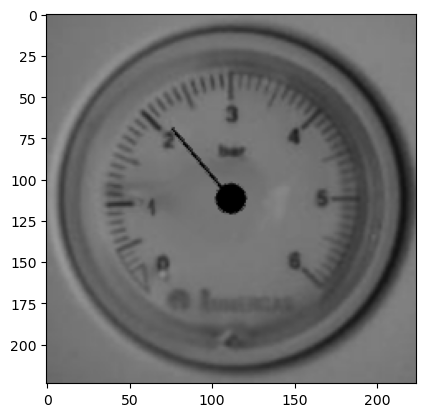

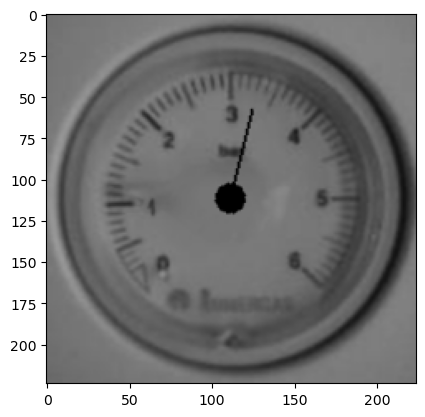

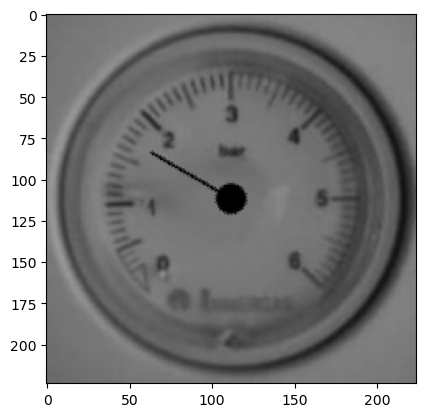

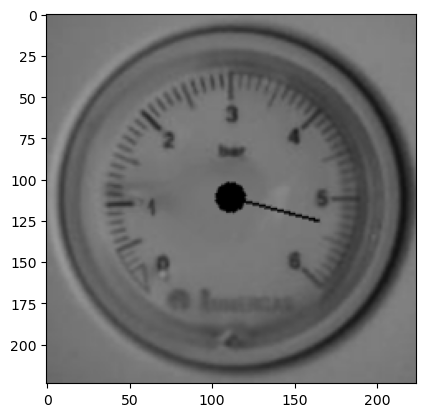

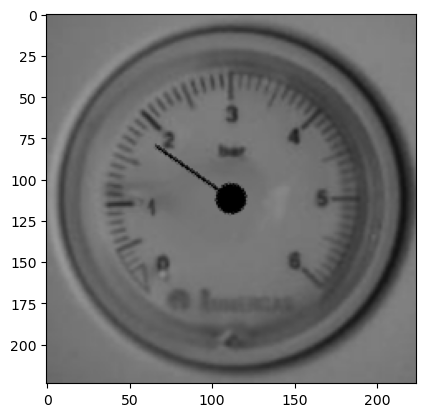

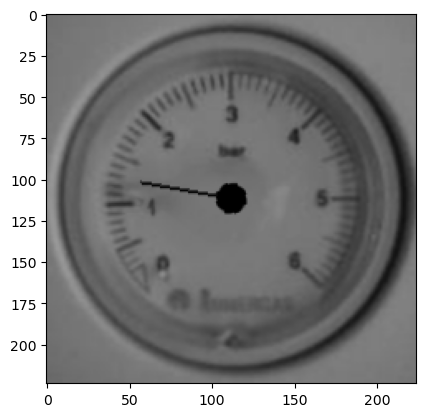

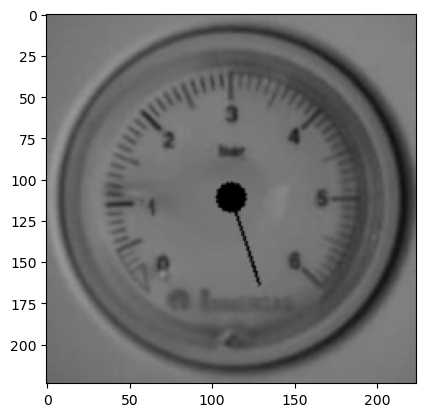

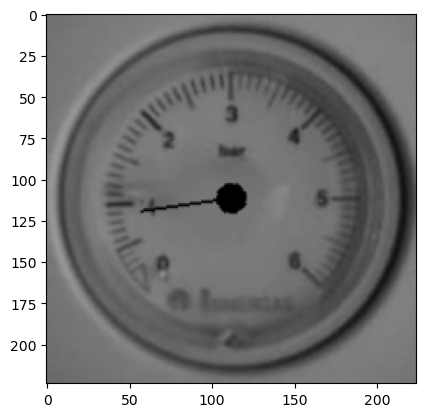

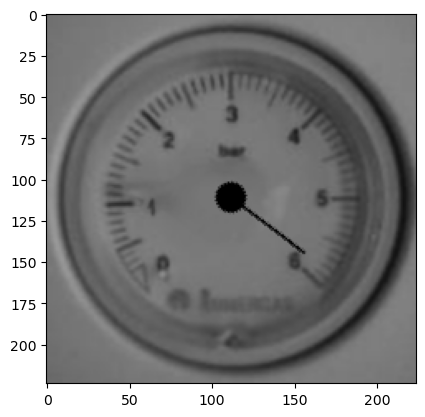

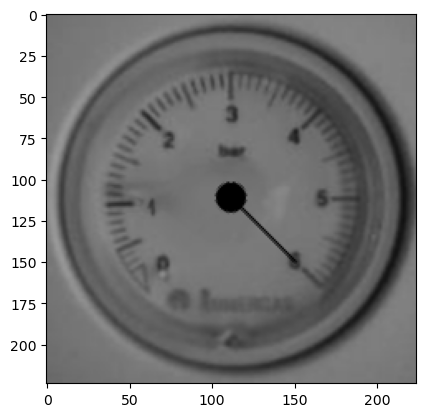

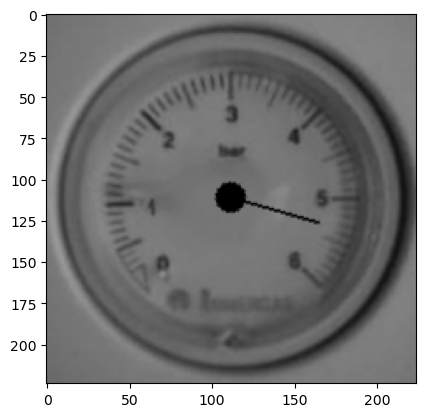

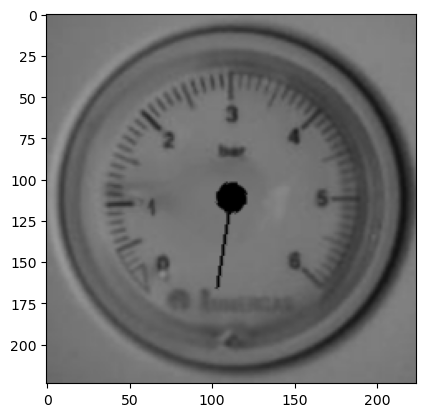

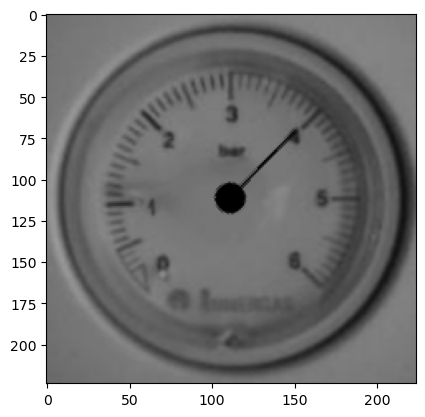

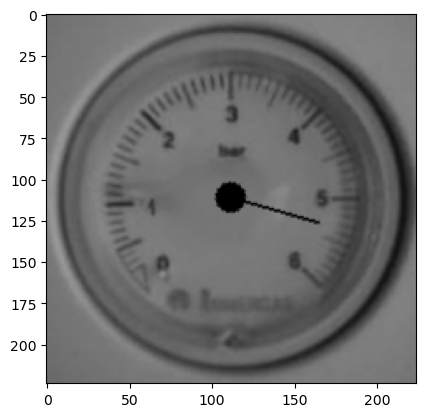

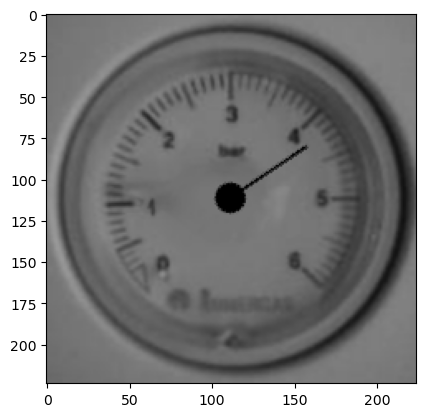

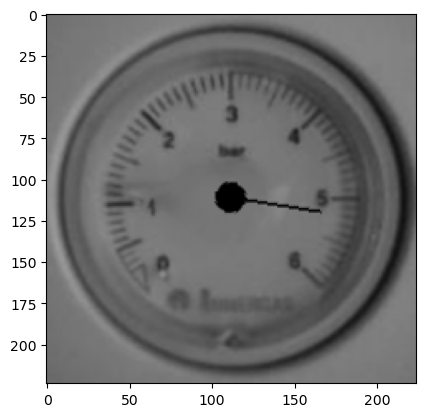

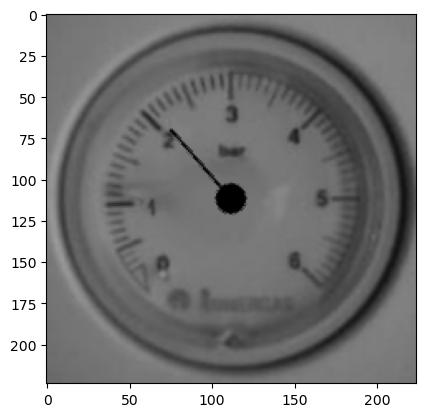

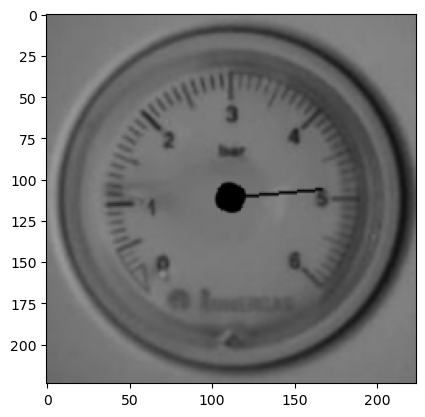

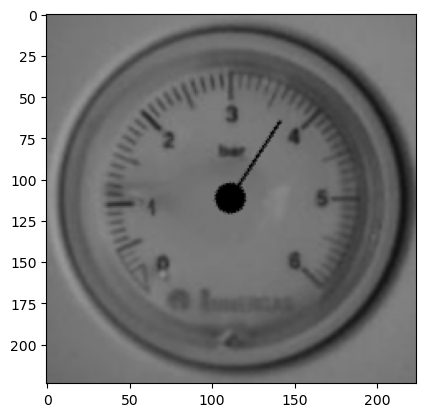

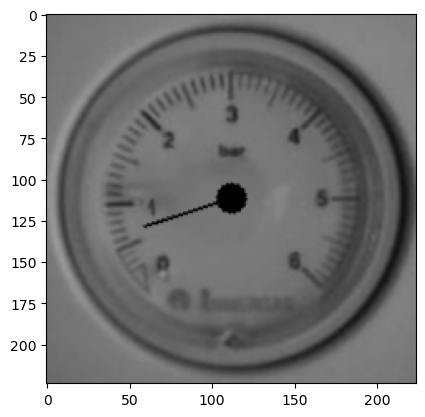

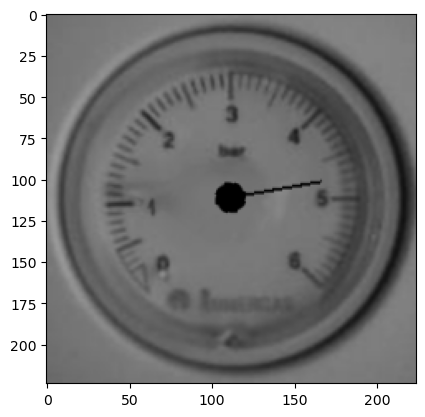

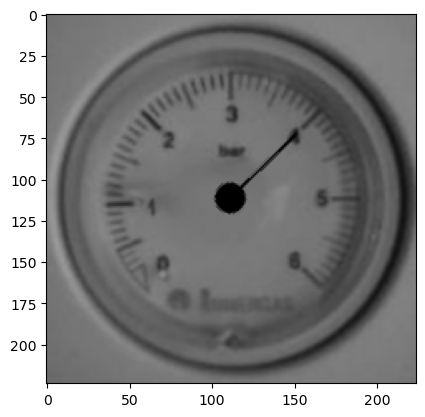

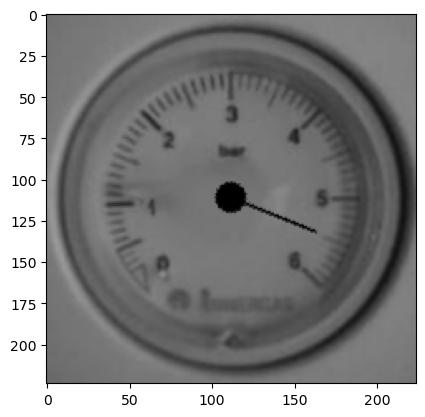

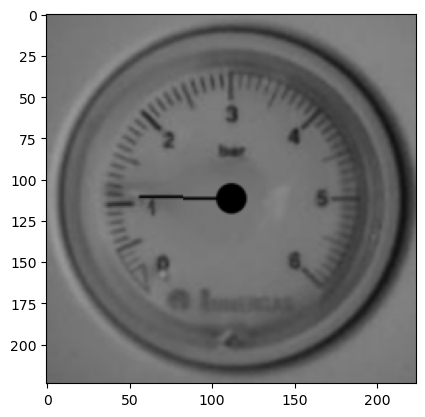

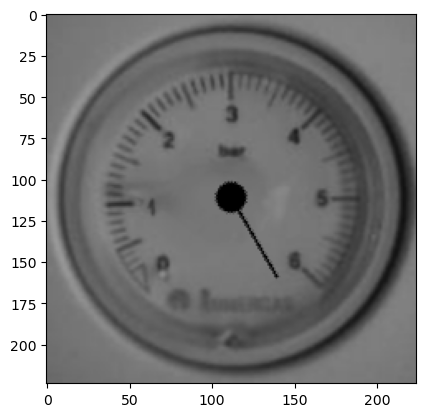

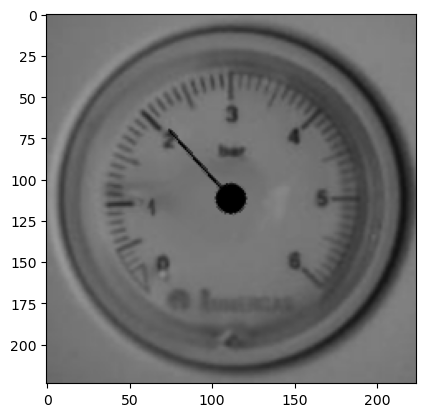

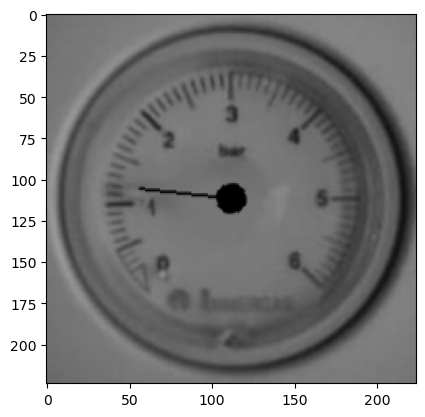

In [25]:
for i in range(50):
    show_img_path = train_img_path + str(i) + ".png"
    show_img = Image.open(show_img_path).convert('RGBA')
    plt.imshow(show_img, cmap='gray')
    plt.show()